In [2]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import skrf as rf
import sys
from SiPANN import nn
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

INFO:tensorflow:Restoring parameters from /home/contagon/Documents/SiPANN/SiPANN/ANN/TIGHT_ANGLE_GAP/model
INFO:tensorflow:Restoring parameters from /home/contagon/Documents/SiPANN/SiPANN/ANN/TIGHT_ANGLE_STRAIGHT/model
INFO:tensorflow:Restoring parameters from /home/contagon/Documents/SiPANN/SiPANN/ANN/TIGHT_ANGLE_BENT_RAND/model


/home/contagon/anaconda3/envs/sipann/lib/python3.7/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator PolynomialFeatures from version 0.20.2 when using version 0.20.4. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/contagon/anaconda3/envs/sipann/lib/python3.7/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator LinearRegression from version 0.20.2 when using version 0.20.4. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/contagon/anaconda3/envs/sipann/lib/python3.7/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator Pipeline from version 0.20.2 when using version 0.20.4. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


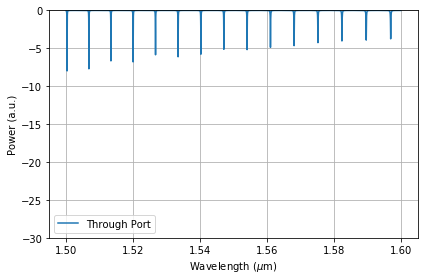

In [5]:
# Set up input parameters
wavelength    = np.squeeze(np.linspace(1.5,1.6,5000))
#radius        = 12
#couplerLength = 2
#sideLength    = 5
#gap           = 0.14
#width         = 0.5
#thickness     = 0.22

# Calculate the scattering matrix
fig =   plt.figure(figsize=(20, 20))
def f(radius,couplerLength,gap,width,thickness,sw_angle,couplerWidth):
    E, alpha, t, alpha_s, _ = nn.racetrack_AP_RR_TF(wavelength,widthCoupler=couplerWidth,radius=radius,sw_angle=sw_angle,couplerLength=couplerLength,gap=gap,width=width,thickness=thickness)

    # Evaluate response
    input       = np.squeeze([1,0])
    throughPort = 10*np.log10(np.abs(np.squeeze(E)) ** 2)

    # Visualize

    fig.clf()
    plt.plot(wavelength,(throughPort),label='Through Port')
    plt.xlabel('Wavelength ($\mu$m)')
    plt.ylabel('Power (a.u.)')
    plt.grid(True)
    plt.legend()
    plt.ylim(-30, 0.1)
    #plt.xlim(1.55,1.56)
    plt.tight_layout()

    plt.show()

interactive_plot = interactive(f, 
                               radius=(11.0, 13.0,0.01), 
                               couplerLength=(4,5,0.01),
                               gap = (0.05,0.300,0.01),
                               couplerWidth = (0.4,0.6,0.01),
                               width = (0.45,0.55,0.01),
                               thickness = (0.18,0.25,0.001),
                               sw_angle = (80,90,0.01),
                               continuous_update=True
                              )
output = interactive_plot.children[-1]
output.layout.height = '1000px'
interactive_plot

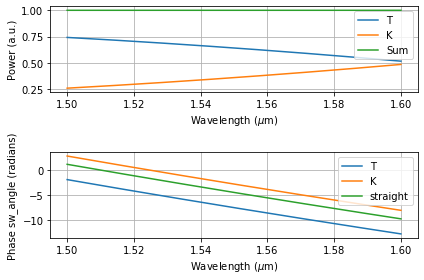

In [7]:

fig =   plt.figure(figsize=(20, 20))
def f(radius,couplerLength,gap,thickness,sw_angle,couplerWidth):
    cTE0,cTE1 = nn.evWGcoupler(wavelength=wavelength,width=couplerWidth,thickness=thickness,sw_angle=sw_angle,gap=gap)
    n1 = np.squeeze(cTE0)     # Get the first mode of the coupler region
    n2 = np.squeeze(cTE1)     # Get the second mode of the coupler region
    Beta1 = 2*np.pi*n1 / wavelength
    Beta2 = 2*np.pi*n2 / wavelength
    x = 0.5 * (np.exp(1j*Beta1*couplerLength) + np.exp(1j*Beta2*couplerLength))
    y = 0.5 * (np.exp(1j*Beta1*couplerLength) + np.exp(1j*Beta2*couplerLength - 1j*np.pi))

    alpha_c = np.sqrt(np.abs(x) ** 2 + np.abs(y) ** 2)

    t_c = x
    k_c = y
    
    TE0 = np.squeeze(nn.straightWaveguide(wavelength=wavelength,width=couplerWidth,thickness=thickness,sw_angle=sw_angle))
    BetaStraight = 2*np.pi*np.real(TE0) / wavelength
    straight = np.squeeze( BetaStraight * couplerLength)
    norm = np.floor(straight/(np.pi))
    straight = straight - norm[0]*np.pi
    
    # Visualize
    fig.clf()
    plt.subplot(2,1,1)
    plt.plot(wavelength,np.abs(t_c)**2,label='T')
    plt.plot(wavelength,np.abs(k_c)**2,label='K')
    plt.plot(wavelength,np.abs(k_c)**2+np.abs(t_c)**2,label='Sum')
    plt.xlabel('Wavelength ($\mu$m)')
    plt.ylabel('Power (a.u.)')
    plt.grid(True)
    plt.legend()
    
    plt.subplot(2,1,2)
    plt.plot(wavelength,np.unwrap(np.angle(t_c)),label='T')
    plt.plot(wavelength,np.unwrap(np.angle(k_c)),label='K')  
    plt.plot(wavelength,straight,label='straight')
    plt.xlabel('Wavelength ($\mu$m)')
    plt.ylabel('Phase sw_angle (radians)')
    plt.grid(True)
    plt.legend()
    #plt.xlim(1.55,1.56)
    plt.tight_layout()

    plt.show()
interactive_plot = interactive(f, 
                               radius=(11.0, 13.0,0.01), 
                               couplerLength=(1,20,0.01),
                               gap = (0.05,0.300,0.01),
                               couplerWidth = (0.4,0.6,0.01),
                               width = (0.45,0.55,0.01),
                               thickness = (0.18,0.25,0.001),
                               sw_angle = (80,90,0.01),
                               continuous_update=False
                              )

output = interactive_plot.children[-1]
output.layout.height = '200'
interactive_plot